<a href="https://colab.research.google.com/github/rohammaiti/DL-Simplified/blob/main/Brain_Tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d roham1/brain-tumor-dataset
!unzip brain-tumor-dataset.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/roham1/brain-tumor-dataset
License(s): unknown
 74% 47.0M/63.3M [00:00<00:00, 145MB/s]
100% 63.3M/63.3M [00:00<00:00, 143MB/s]
Archive:  brain-tumor-dataset.zip
  inflating: Brain MRI Image/NoTumor/Tr-noTr_0000.jpg  
  inflating: Brain MRI Image/NoTumor/Tr-noTr_0001.jpg  
  inflating: Brain MRI Image/NoTumor/Tr-noTr_0002.jpg  
  inflating: Brain MRI Image/NoTumor/Tr-noTr_0003.jpg  
  inflating: Brain MRI Image/NoTumor/Tr-noTr_0004.jpg  
  inflating: Brain MRI Image/NoTumor/Tr-noTr_0005.jpg  
  inflating: Brain MRI Image/NoTumor/Tr-noTr_0006.jpg  
  inflating: Brain MRI Image/NoTumor/Tr-noTr_0007.jpg  
  inflating: Brain MRI Image/NoTumor/Tr-noTr_0008.jpg  
  inflating: Brain MRI Image/NoTumor/Tr-noTr_0009.jpg  
  inflating: Brain MRI Image/NoTumor/Tr-no_0010.jpg  
  inflating: Brain MRI Image/NoTumor/Tr-no_0011.jpg  
  inflating: Brain MRI Image/NoTumor/Tr-no_0012.jpg  
  inflating: Brain MRI Image/NoTumor/T

In [2]:
!sudo pip3 install keras
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
tumor_folder = "Brain MRI Image/Tumor"
notumor_folder = "Brain MRI Image/NoTumor"

tumor_images = len(os.listdir(tumor_folder))
notumor_images = len(os.listdir(notumor_folder))

print("Total Tumor images:", tumor_images)
print("Total NoTumor images:", notumor_images)

Total Tumor images: 1500
Total NoTumor images: 1500


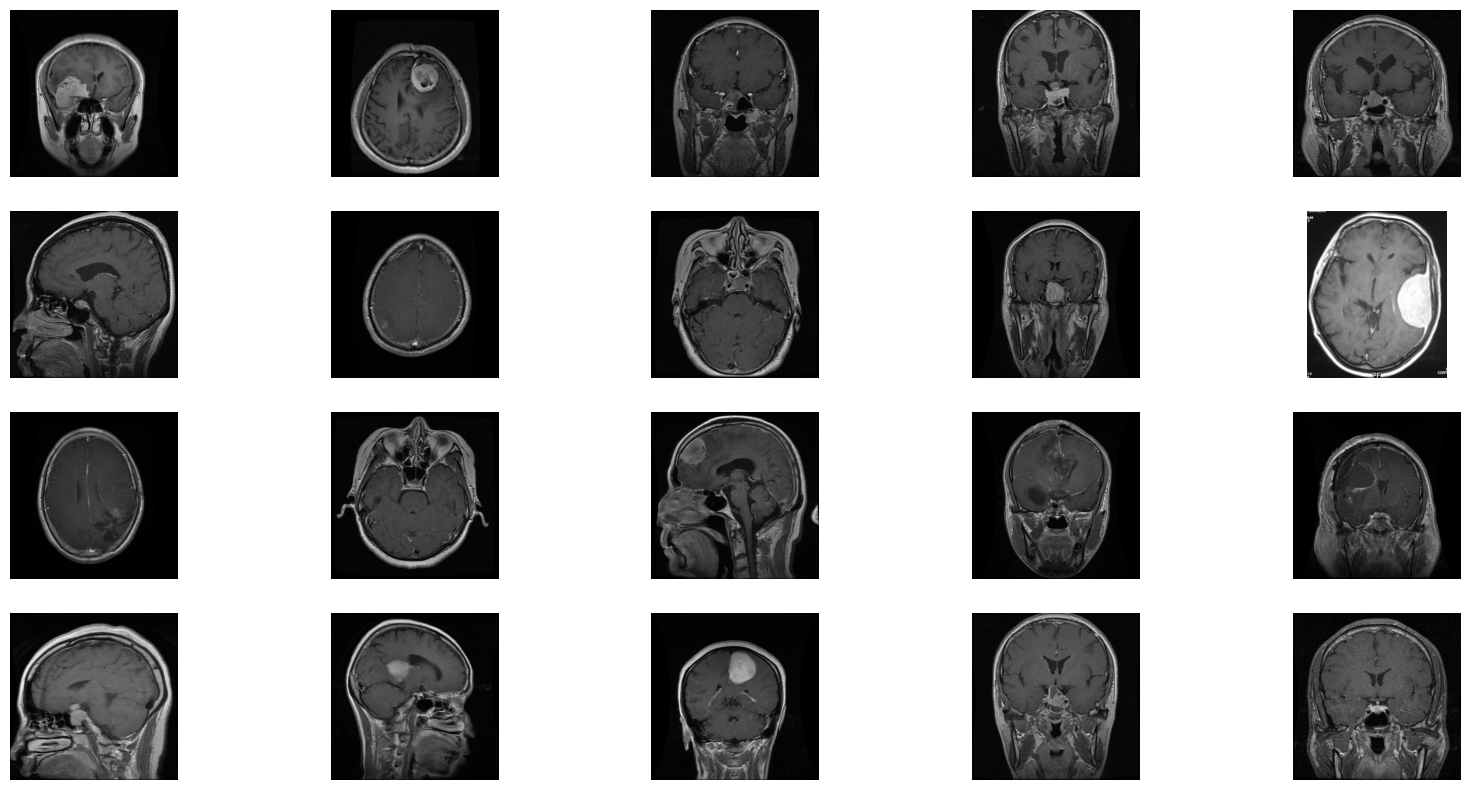

In [4]:
tumor_images = os.listdir(tumor_folder)

plt.figure(figsize=(20, 10))
for i, image_name in enumerate(tumor_images[:20]):
    img = cv2.imread(os.path.join(tumor_folder, image_name))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(4, 5, i+1)
    plt.imshow(img_rgb)
    plt.axis('off')

plt.show()

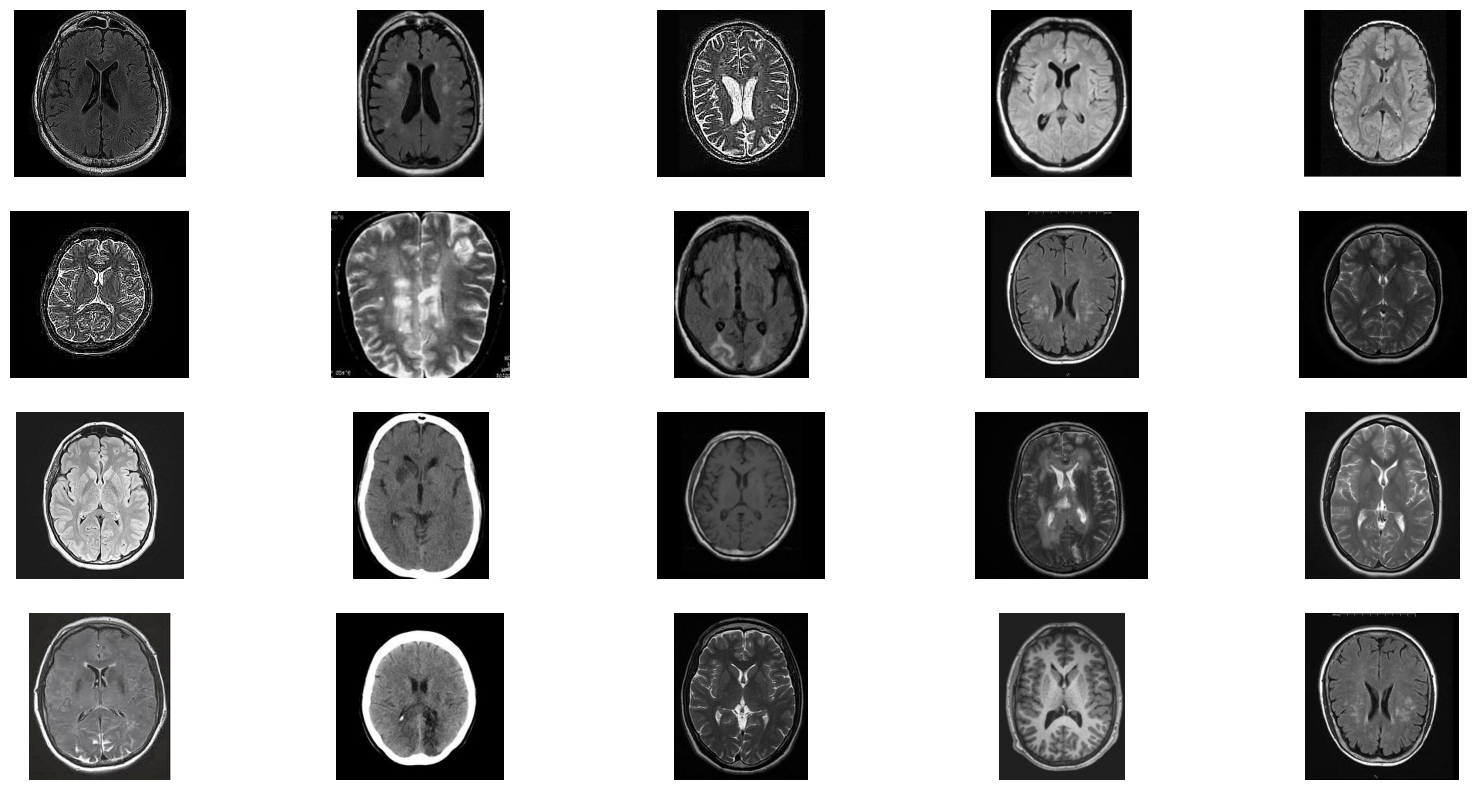

In [5]:
notumor_images = os.listdir(notumor_folder)

plt.figure(figsize=(20, 10))
for i, image_name in enumerate(notumor_images[:20]):
    img = cv2.imread(os.path.join(notumor_folder, image_name))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(4, 5, i+1)
    plt.imshow(img_rgb)
    plt.axis('off')

plt.show()

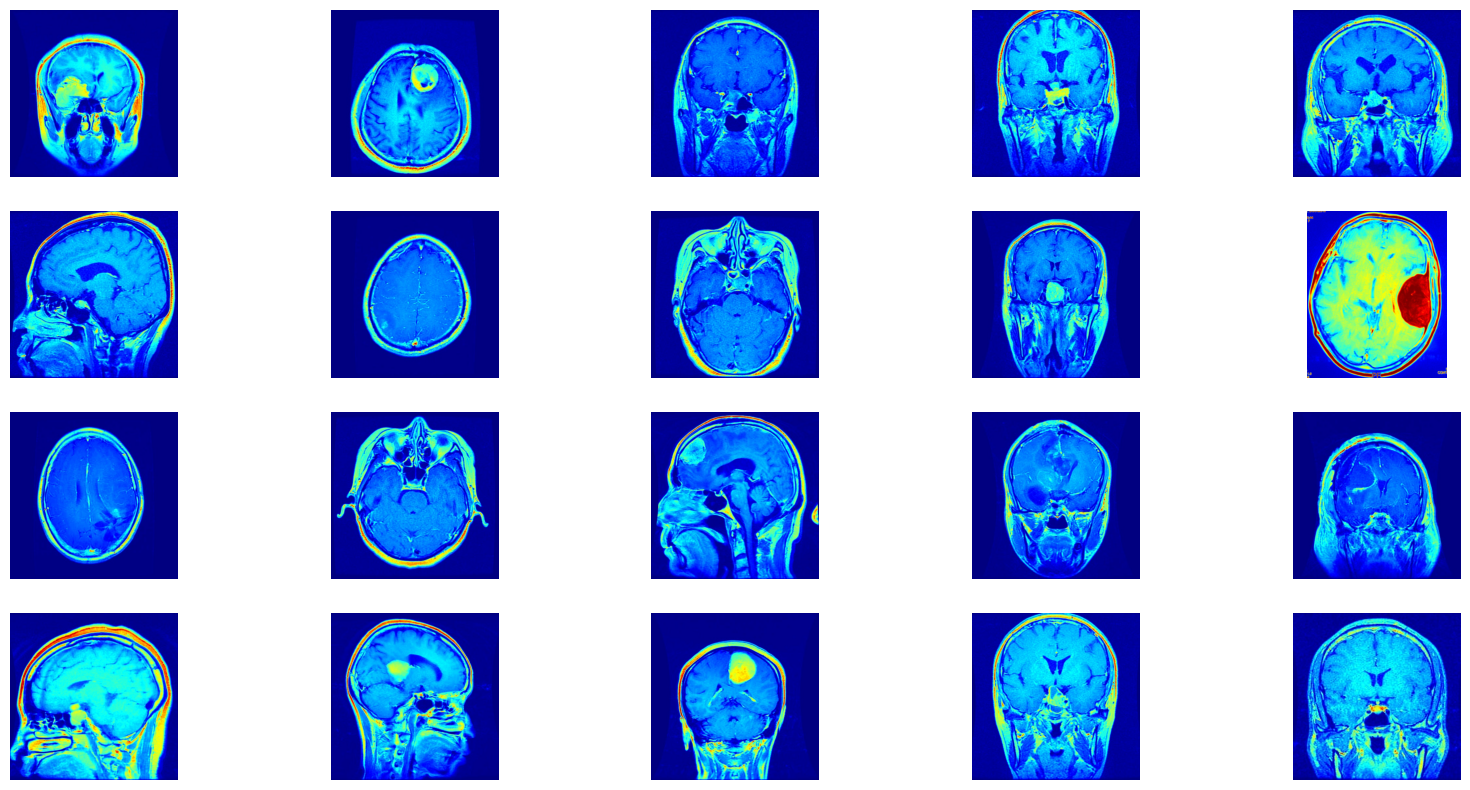

In [6]:
tumor_images = os.listdir(tumor_folder)

for image_name in tumor_images:
    image_path = os.path.join(tumor_folder, image_name)
    img = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thermal_img = cv2.applyColorMap(img_gray, cv2.COLORMAP_JET)
    cv2.imwrite(image_path, thermal_img)

plt.figure(figsize=(20, 10))
for i, image_name in enumerate(tumor_images[:20]):
    img = cv2.imread(os.path.join(tumor_folder, image_name))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(4, 5, i+1)
    plt.imshow(img_rgb)
    plt.axis('off')

plt.show()

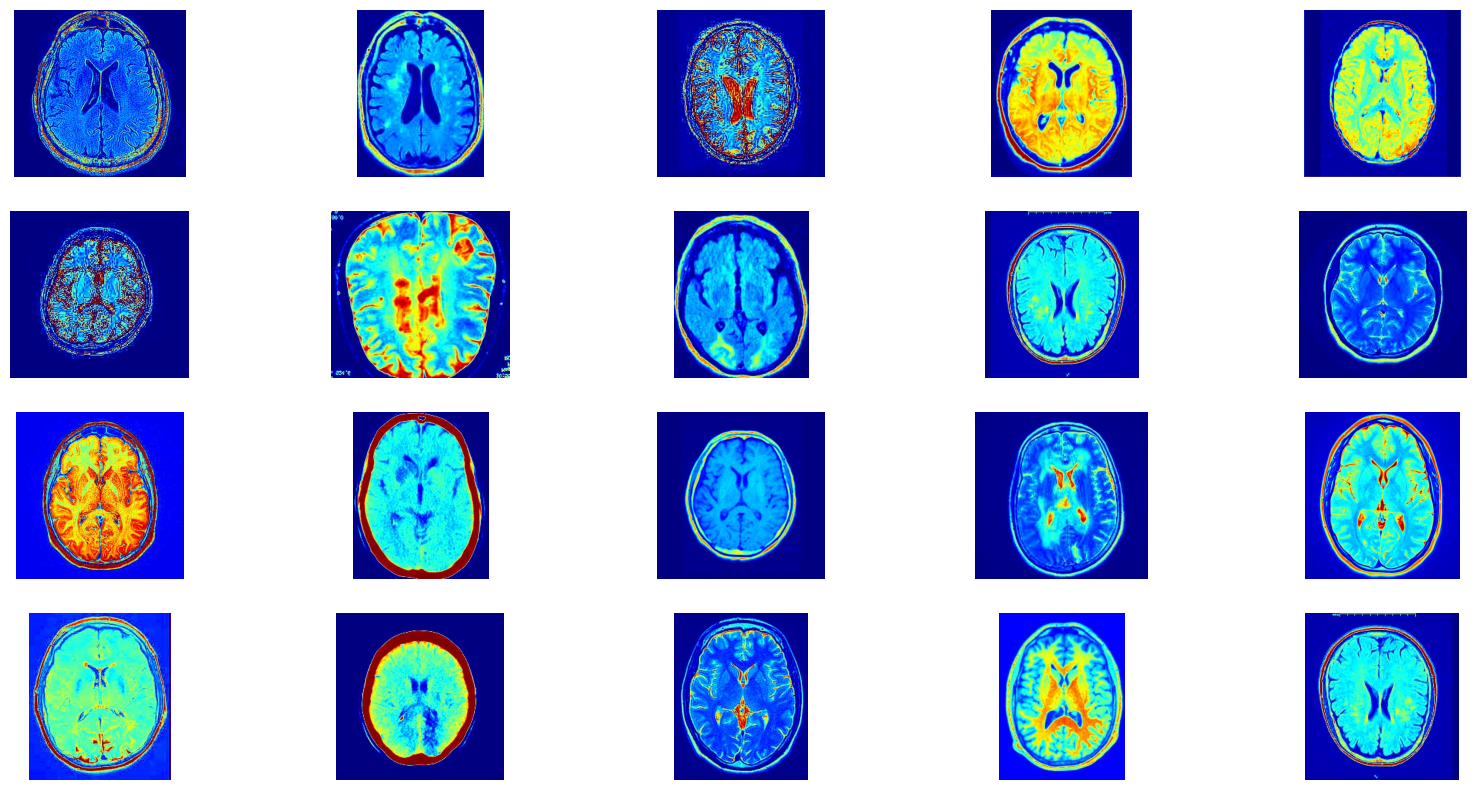

In [7]:
notumor_images = os.listdir(notumor_folder)

for image_name in notumor_images:
    image_path = os.path.join(notumor_folder, image_name)
    img = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thermal_img = cv2.applyColorMap(img_gray, cv2.COLORMAP_JET)
    cv2.imwrite(image_path, thermal_img)

plt.figure(figsize=(20, 10))
for i, image_name in enumerate(notumor_images[:20]):
    img = cv2.imread(os.path.join(notumor_folder, image_name))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(4, 5, i+1)
    plt.imshow(img_rgb)
    plt.axis('off')

plt.show()

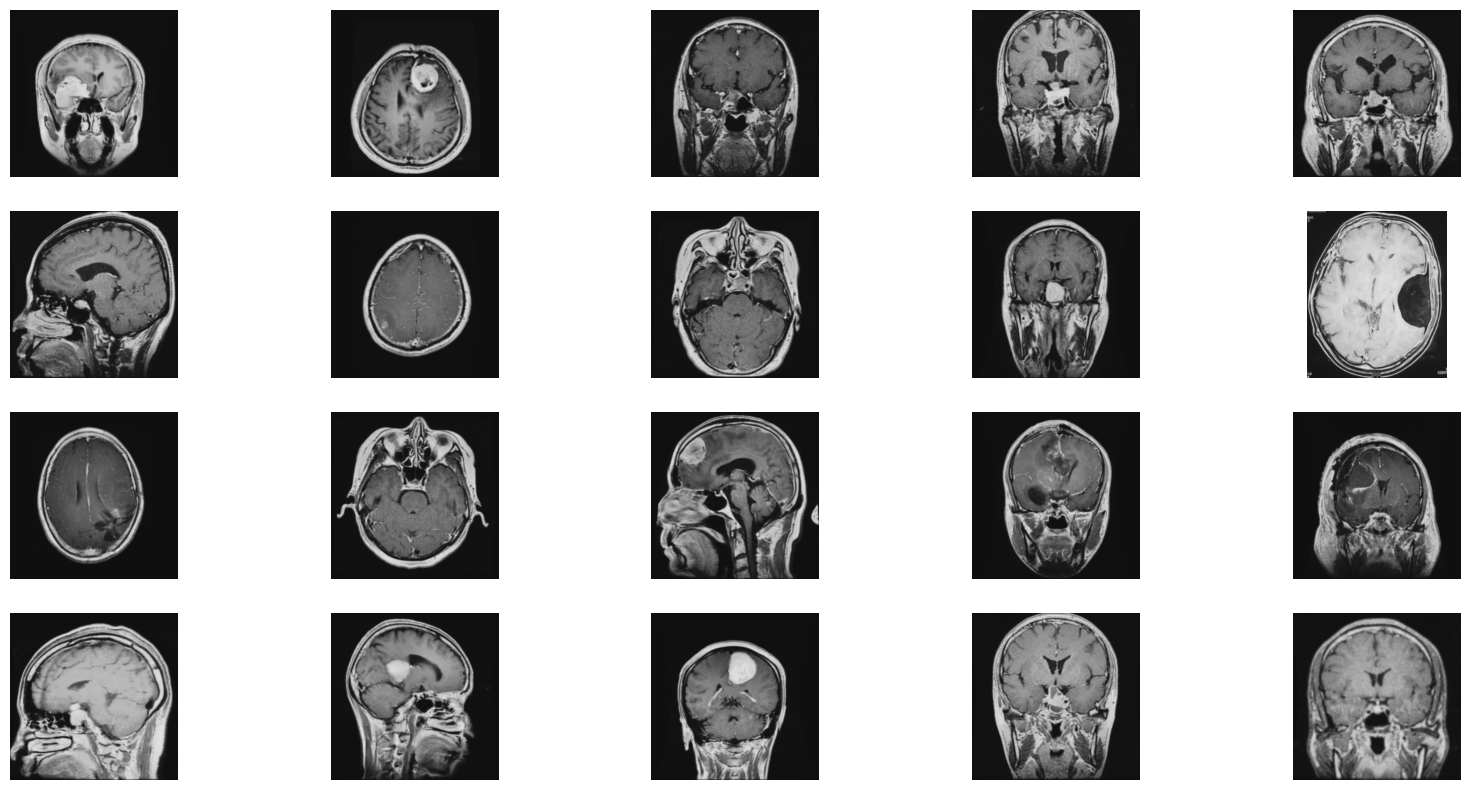

In [8]:
tumor_images = os.listdir(tumor_folder)

for image_name in tumor_images:
    image_path = os.path.join(tumor_folder, image_name)
    img = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)
    cv2.imwrite(image_path, img_blur)

plt.figure(figsize=(20, 10))
for i, image_name in enumerate(tumor_images[:20]):
    img = cv2.imread(os.path.join(tumor_folder, image_name))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(4, 5, i+1)
    plt.imshow(img_rgb)
    plt.axis('off')

plt.show()

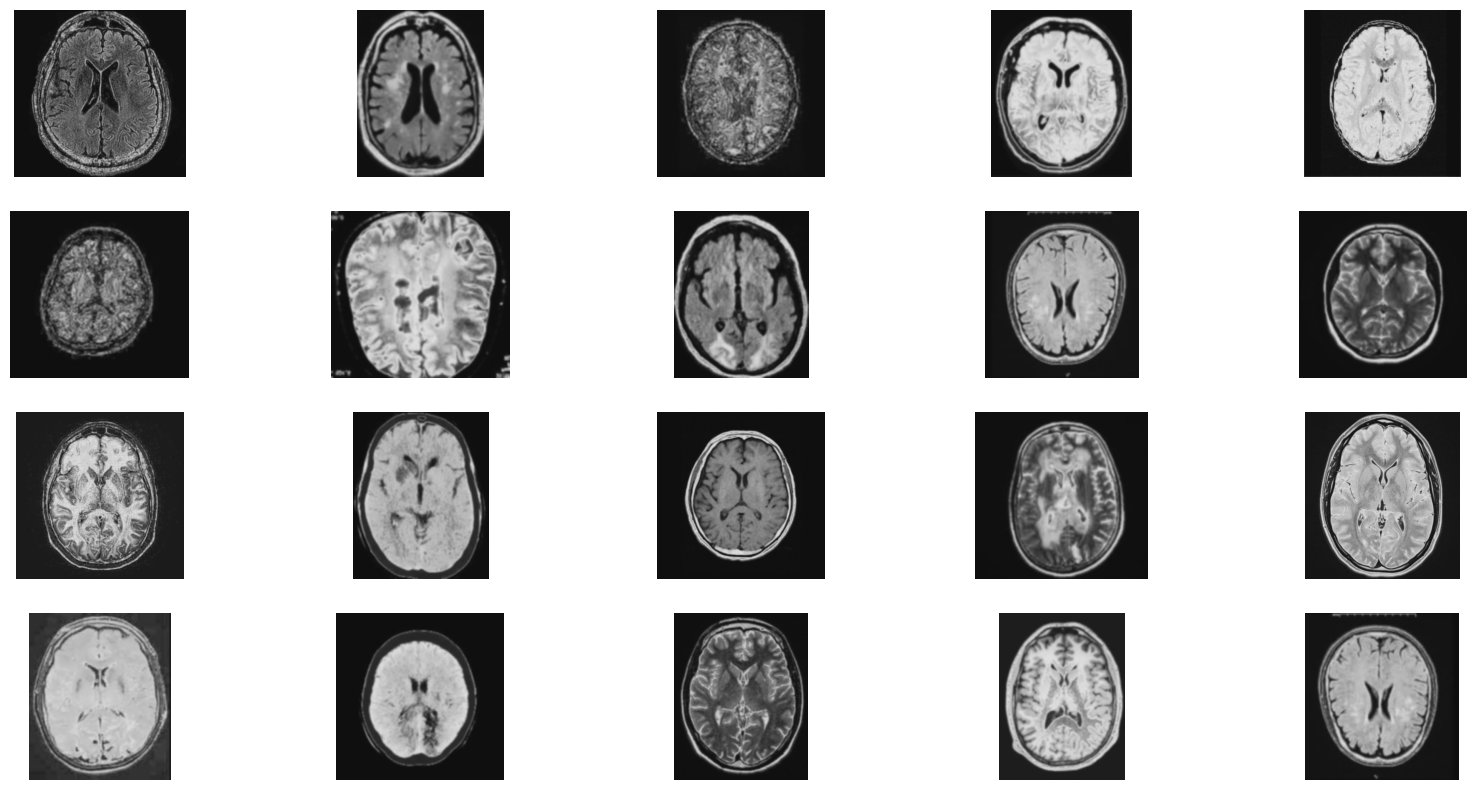

In [9]:
notumor_images = os.listdir(notumor_folder)

for image_name in notumor_images:
    image_path = os.path.join(notumor_folder, image_name)
    img = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)
    cv2.imwrite(image_path, img_blur)

plt.figure(figsize=(20, 10))
for i, image_name in enumerate(notumor_images[:20]):
    img = cv2.imread(os.path.join(notumor_folder, image_name))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(4, 5, i+1)
    plt.imshow(img_rgb)
    plt.axis('off')

plt.show()

In [10]:
tumor_folder = "Brain MRI Image/Tumor"
notumor_folder = "Brain MRI Image/NoTumor"

def load_images(directory):
    images = []
    labels = []
    for label, class_dir in enumerate(directory):
        files = os.listdir(class_dir)
        for file in files:
            img = cv2.imread(os.path.join(class_dir, file))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (128, 128))
            images.append(img)
            labels.append(label)
    return images, labels

images, labels = load_images([notumor_folder, tumor_folder])
images = np.array(images)
labels = np.array(labels)
images = images / 255.0
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=56)
X_train = X_train.reshape(-1, 128, 128, 1)
X_val = X_val.reshape(-1, 128, 128, 1)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [11]:
def convert_to_rgb(images):
    return np.repeat(images, 3, axis=-1)

images = convert_to_rgb(images)
X_train = convert_to_rgb(X_train)
X_val = convert_to_rgb(X_val)

In [12]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model_mobilenet.keras', save_best_only=True, monitor='val_loss')

history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping, checkpoint])

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 49s 613ms/step - accuracy: 0.7534 - loss: 0.4784 - val_accuracy: 0.9667 - val_loss: 0.1103
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 47s 628ms/step - accuracy: 0.9725 - loss: 0.0937 - val_accuracy: 0.9800 - val_loss: 0.0791
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 48s 635ms/step - accuracy: 0.9771 - loss: 0.0694 - val_accuracy: 0.9867 - val_loss: 0.0678
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 79s 598ms/step - accuracy: 0.9876 - loss: 0.0465 - val_accuracy: 0.9867 - val_loss: 0.0621
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 82s 602ms/step - accuracy: 0.9890 - loss: 0.0403 - val_accuracy: 0.9867 - val_loss: 0.0601
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 83s 623ms/step - accuracy: 0.9931 - loss: 0.0303 - val_accuracy: 0.9867 - val_loss: 0.0574
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 81s 604ms/step - accuracy: 0.9923 - loss: 0.0283 - val_accuracy: 0.9850 - val_loss: 0.0582
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 83s 623ms/step - accuracy: 0.9958 - loss: 0.0244 - val_accu

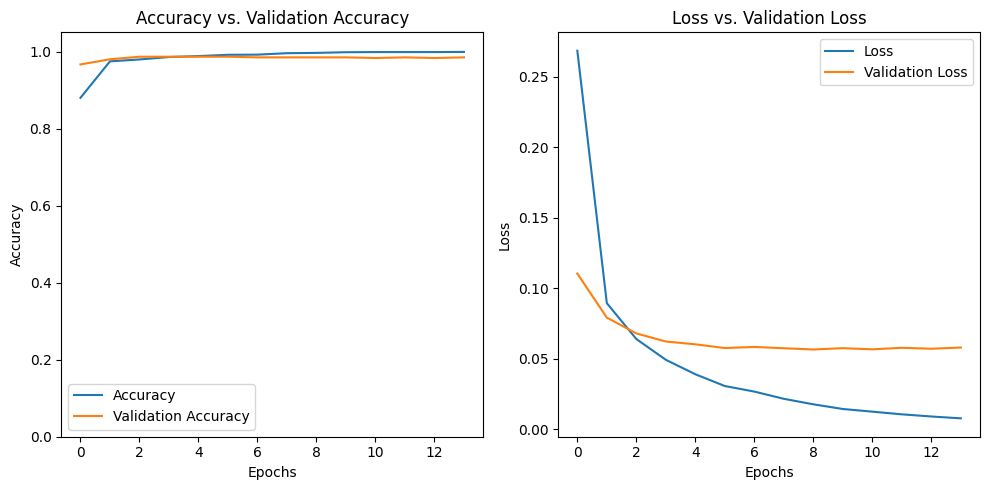

In [14]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Validation Accuracy')
plt.ylim([0., 1.05])
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 64, 64, 32)          │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 64, 64, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 64, 64, 32)          │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 64, 64, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 64, 64, 64)          │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 64, 64, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 65, 65, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 32, 32, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 32, 32, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 32, 32, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 32, 32, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 32, 32, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 32, 32, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 32, 32, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,017,608 (15.33 MB)

 Trainable params: 262,914 (1.00 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

 Optimizer params: 525,830 (2.01 MB)

In [16]:
model.load_weights('best_model_mobilenet.keras')
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 509ms/step - accuracy: 0.9861 - loss: 0.0550
Validation Loss: 0.05643192306160927
Validation Accuracy: 0.9850000143051147


In [17]:
model = load_model('best_model_mobilenet.keras')
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 472ms/step


In [18]:
cm = confusion_matrix(y_true, y_pred_classes)

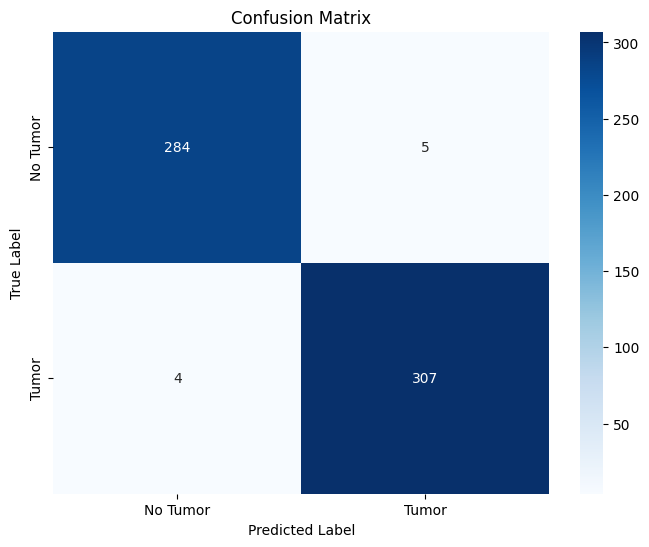

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Tumor', 'Tumor'],
            yticklabels=['No Tumor', 'Tumor'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [20]:
model = load_model('best_model_mobilenet.keras')

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

report = classification_report(y_true_classes, y_pred_classes, target_names=["No Tumor", "Tumor"])
print(report)

19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 423ms/step
              precision    recall  f1-score   support

    No Tumor       0.99      0.98      0.98       289
       Tumor       0.98      0.99      0.99       311

    accuracy                           0.98       600
   macro avg       0.99      0.98      0.98       600
weighted avg       0.99      0.98      0.98       600



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 877ms/step


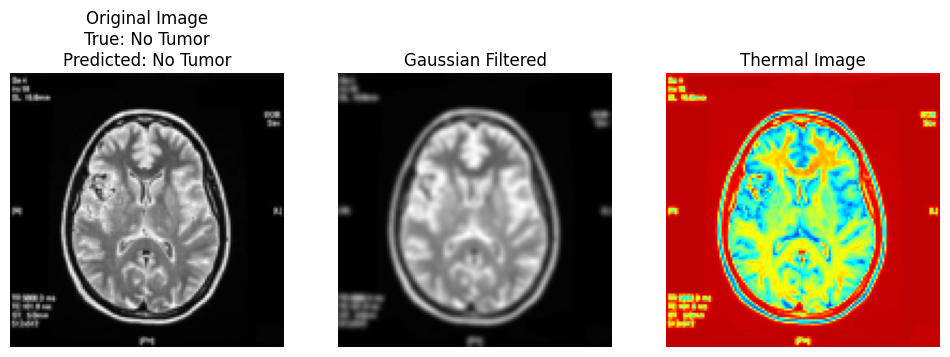

In [21]:
model = load_model('best_model_mobilenet.keras')

def load_random_image(folder_path):
    files = os.listdir(folder_path)
    random_file = random.choice(files)
    img_path = os.path.join(folder_path, random_file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (128, 128))
    return img, random_file

folder_choice = random.choice([tumor_folder, notumor_folder])
img, filename = load_random_image(folder_choice)

img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
img_input = np.expand_dims(img_rgb, axis=0) / 255.0
preds = model.predict(img_input)
predicted_class = np.argmax(preds, axis=1)[0]

true_class = 1 if folder_choice == tumor_folder else 0

gaussian_img = cv2.GaussianBlur(img, (5, 5), 0)

thermal_img = cv2.applyColorMap(img, cv2.COLORMAP_JET)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title(f'Original Image\nTrue: {"Tumor" if true_class == 1 else "No Tumor"}\nPredicted: {"Tumor" if predicted_class == 1 else "No Tumor"}')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gaussian_img, cmap='gray')
plt.title('Gaussian Filtered')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(thermal_img)
plt.title('Thermal Image')
plt.axis('off')

plt.show()

Saving image8.jpg to image8.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step


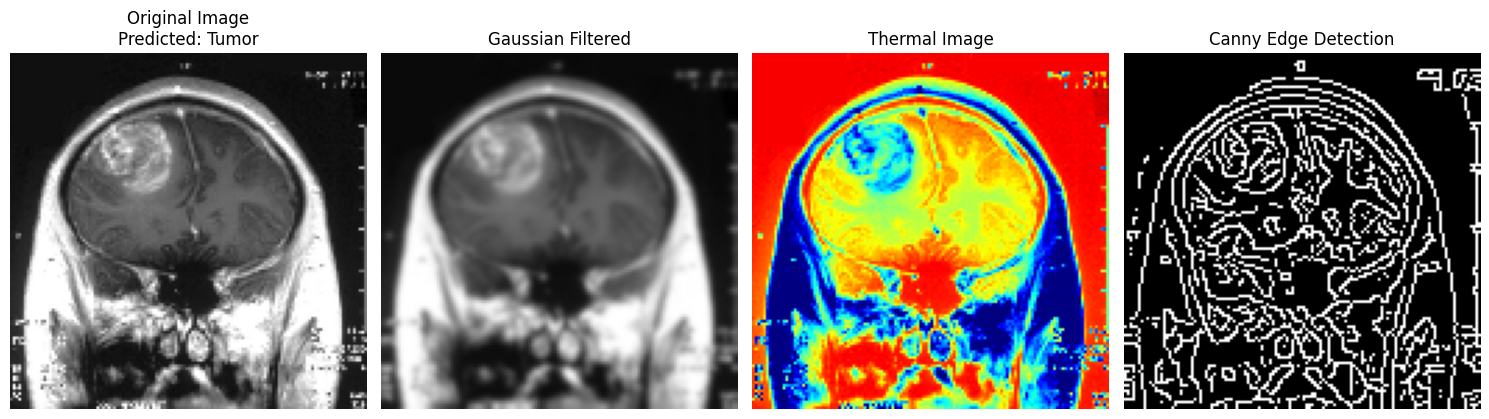

In [22]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (128, 128))

model = load_model('best_model_mobilenet.keras')

img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
img_input = np.expand_dims(img_rgb, axis=0) / 255.0

preds = model.predict(img_input)
predicted_class = np.argmax(preds, axis=1)[0]

gaussian_img = cv2.GaussianBlur(img, (5, 5), 1)

thermal_img = cv2.applyColorMap(img, cv2.COLORMAP_JET)

edges = cv2.Canny(gaussian_img, 20, 20)

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title(f'Original Image\nPredicted: {"Tumor" if predicted_class == 1 else "No Tumor"}')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(gaussian_img, cmap='gray')
plt.title('Gaussian Filtered')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(thermal_img)
plt.title('Thermal Image')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')

plt.tight_layout()
plt.show()